# Air Quality Measurement

In [36]:
# Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.impute import SimpleImputer

In [37]:
# Load dataset
file_path = "/content/Dataset-AirQuality.csv"
df = pd.read_csv(file_path, sep=';', decimal=',')

In [38]:
# Clean column names
df.columns = df.columns.str.strip()
df.columns = df.columns.str.replace('"','')

In [39]:
print("Dataset Loaded")
print("Shape:", df.shape)
print("First 10 Columns:", df.columns.tolist()[:10])

Dataset Loaded
Shape: (9471, 17)
First 10 Columns: ['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)']


In [40]:
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,NaN,NaN
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,NaN,NaN
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,NaN,NaN
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,NaN,NaN
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,NaN,NaN


In [41]:
# Drop empty unnamed columns
df = df.dropna(axis=1, how='all')

In [42]:
# Combine Date and Time into DateTime
df['DateTime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], errors='coerce', dayfirst=True)


/tmp/ipython-input-1973543556.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['DateTime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], errors='coerce', dayfirst=True)


In [43]:
# Drop original Date and Time
df.drop(['Date','Time'], axis=1, inplace=True)

In [45]:
# Replace -200 (missing values) with NaN
df.replace(-200, np.nan, inplace=True)

In [46]:
# Handle missing values (forward fill)
df.fillna(method='ffill', inplace=True)


/tmp/ipython-input-1417222194.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


In [47]:
print(df.columns.tolist())

['CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH', 'DateTime']


In [48]:
# Clean column names (remove spaces just in case)
df.columns = df.columns.str.strip()

In [49]:
# Select available features
features = ['CO(GT)', 'NO2(GT)', 'C6H6(GT)', 'T', 'RH']
df = df[features + ['DateTime']]

In [50]:
# Keep only numeric columns that have at least some valid values
numeric_cols = df.select_dtypes(include=np.number).columns
df = df[numeric_cols.tolist() + ['DateTime']]

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   CO(GT)    9471 non-null   float64       
 1   NO2(GT)   9471 non-null   float64       
 2   C6H6(GT)  9471 non-null   float64       
 3   T         9471 non-null   float64       
 4   RH        9471 non-null   float64       
 5   DateTime  0 non-null      datetime64[ns]
dtypes: datetime64[ns](1), float64(5)
memory usage: 444.1 KB


In [52]:
# Example: create AQI categories for class distribution plot
df['AQI_Category'] = pd.cut(df['CO(GT)'], bins=[-1, 2, 5, 50],
                            labels=['Good','Moderate','Unhealthy'])

In [57]:
# Split features and target (drop DateTime & AQI_Category)
X = df.drop(['CO(GT)', 'DateTime', 'AQI_Category'], axis=1)
y = df['CO(GT)']

In [58]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


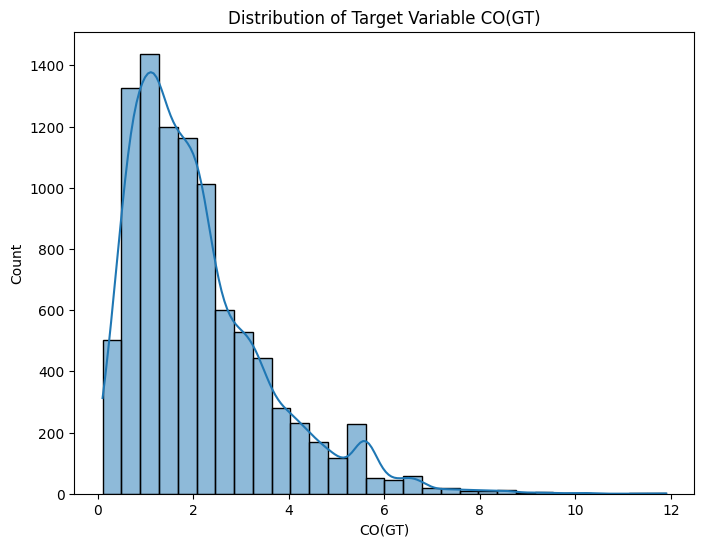

In [59]:
# Distribution of target
plt.figure(figsize=(8,6))
sns.histplot(y, kde=True, bins=30)
plt.title("Distribution of Target Variable CO(GT)")
plt.show()

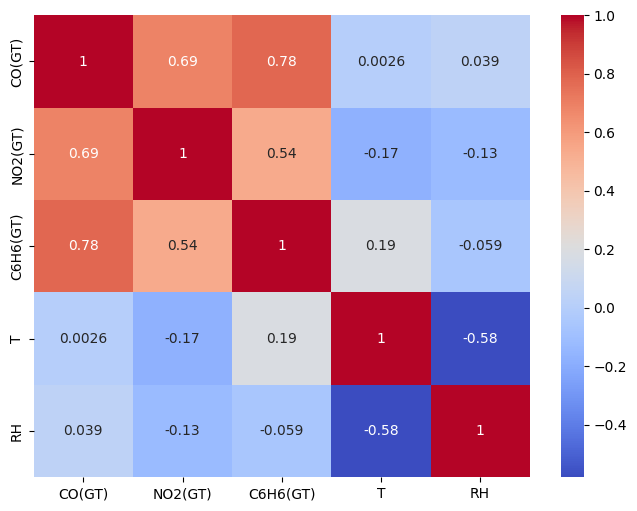

In [61]:
# Heatmap correlation
plt.figure(figsize=(8,6))
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True, cmap="coolwarm")
plt.show()



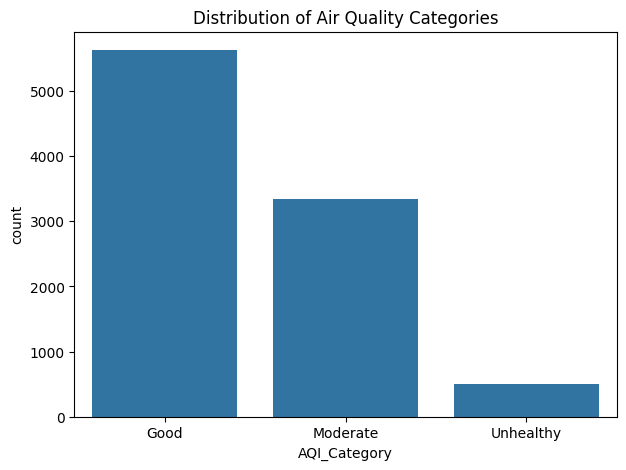

In [62]:
# Air Quality Category Distribution
plt.figure(figsize=(7,5))
sns.countplot(x="AQI_Category", data=df)
plt.title("Distribution of Air Quality Categories")
plt.show()

In [24]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [25]:
rf_reg = RandomForestRegressor(random_state=42)
rf_reg.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [26]:
# Predictions
y_pred_lr = lin_reg.predict(X_test)
y_pred_rf = rf_reg.predict(X_test)

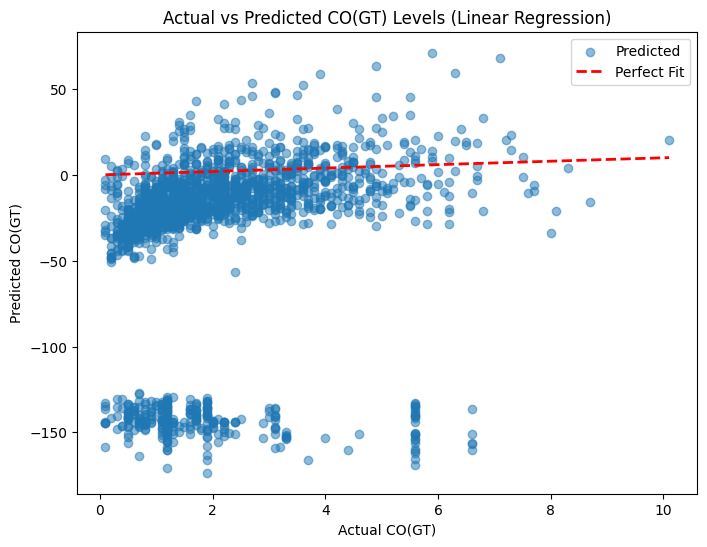

In [63]:
# Linear Regression Actual vs Predicted
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_lr, alpha=0.5, label="Predicted")
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         "r--", lw=2, label="Perfect Fit")
plt.xlabel("Actual CO(GT)")
plt.ylabel("Predicted CO(GT)")
plt.title("Actual vs Predicted CO(GT) Levels (Linear Regression)")
plt.legend()
plt.show()

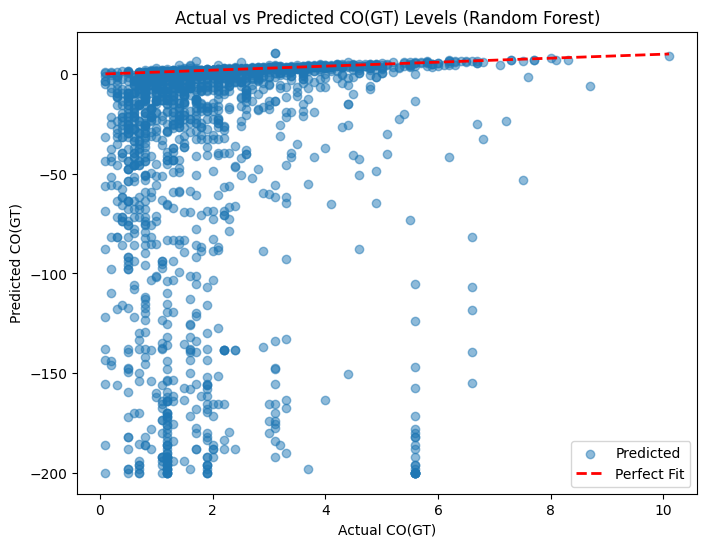

In [64]:
# Random Forest Actual vs Predicted
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_rf, alpha=0.5, label="Predicted")
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         "r--", lw=2, label="Perfect Fit")
plt.xlabel("Actual CO(GT)")
plt.ylabel("Predicted CO(GT)")
plt.title("Actual vs Predicted CO(GT) Levels (Random Forest)")
plt.legend()
plt.show()


In [32]:
# Model Evaluation
print("Linear Regression Coefficients:", lin_reg.coef_)
print("Random Forest Feature Importances:", rf_reg.feature_importances_)
print("Linear Regression MAE:", mean_absolute_error(y_test, y_pred_lr))
print("Linear Regression MSE:", mean_squared_error(y_test, y_pred_lr))
print("Linear Regression R2:", r2_score(y_test, y_pred_lr))

Linear Regression Coefficients: [ 0.43438007 -0.98498889  0.48501653  0.39459518]
Random Forest Feature Importances: [0.54599011 0.13749527 0.15970347 0.15681114]
Linear Regression MAE: 34.75207410396175
Linear Regression MSE: 3038.081789573019
Linear Regression R2: 0.4552997951623845


In [30]:
print("Random Forest MAE:", mean_absolute_error(y_test, y_pred_rf))
print("Random Forest MSE:", mean_squared_error(y_test, y_pred_rf))
print("Random Forest R2:", r2_score(y_test, y_pred_rf))

Random Forest MAE: 26.81188335554503
Random Forest MSE: 2759.4705828298834
Random Forest R2: 0.5052522295912054


In [31]:
# Optimization
from sklearn.model_selection import GridSearchCV

param_grid = {
    "n_estimators": [50, 100],
    "max_depth": [None, 10, 20]
}

grid_search = GridSearchCV(rf_reg, param_grid, cv=3, scoring="r2", n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best R2 Score:", grid_search.best_score_)

Best Parameters: {'max_depth': 10, 'n_estimators': 100}
Best R2 Score: 0.5279692900435182
